# The Sparks Foundation GRIP Task-1,Prediction using Supervised Machine Learning

# Author: Payal Verma

Aim : To predict score if a student studies for 9.25 hrs/ day

# Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns 
sns.set()
import statsmodels.api as sn

# Importing Dataset

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape # to check the shape of the dataset

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
df.corr() #checking the correlation 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Processing

# Data Distribution

C:\Users\Payal verma\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

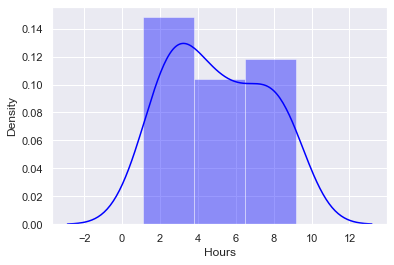

In [6]:
sns.distplot(df["Hours"], color = 'blue')

C:\Users\Payal verma\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

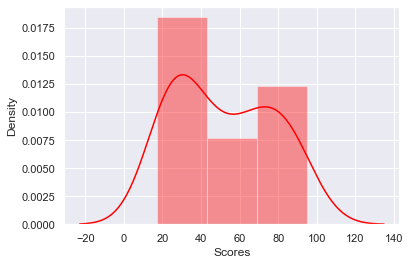

In [7]:
sns.distplot(df["Scores"], color = 'red')    

Hence there is no major outlier present in our dataset

In [8]:
#to check if any value is null values , true-null value, false-nonnull value
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Hence there missing value present

# Visualisation of Data

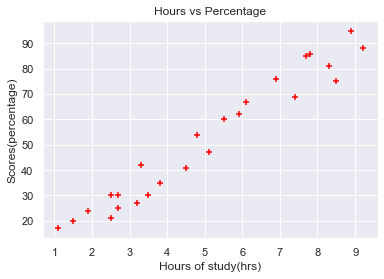

In [21]:
plt.scatter(df.Hours,df.Scores,color='red',marker='+')
plt.title('Hours vs Percentage')
plt.xlabel('Hours of study(hrs)')
plt.ylabel('Scores(percentage)')
plt.show()

here, there is a positive linear relationship between scores and hours of study. Thus Linear Functional Form will be the most appropriate for the model.

# Specifing the Model

In [10]:
Y = df["Scores"]
X1 = df["Hours"]

In [12]:
#splitting the data into traning and testing
y_train, y_test, x_train, x_test = train_test_split(Y,X1, test_size= 0.2, random_state=42)

#fitting a regression line
x=sn.add_constant(x_train)
linear_regression_model = sn.OLS(y_train,x).fit()

In [13]:
#summary of linear regression
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     335.8
Date:                Wed, 12 May 2021   Prob (F-statistic):           4.34e-13
Time:                        13:45:28   Log-Likelihood:                -62.864
No. Observations:                  20   AIC:                             129.7
Df Residuals:                      18   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8269      2.935      0.963      0.348      -3.340       8.994
Hours          9.6821      0.528     18.324      0.000       8.572      10.792
==============================================================================
Omnibus:                        7.043   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.821
Skew:                          -0.134   Prob(JB):                        0.402
Kurtosis:                       1.546   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can conclude that no. of hours spend to study is highly significant at any chosen level of significance and explains approximately 95% of the variation.

# Plotting the regression Line

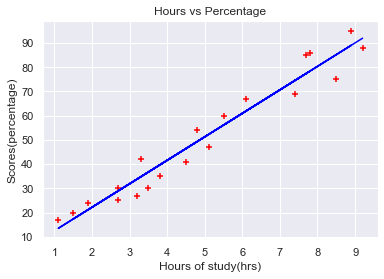

In [14]:
plt.scatter(x_train, y_train ,color='red',marker='+')
Y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, Y_hat, color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours of study(hrs)')
plt.ylabel('Scores(percentage)')
plt.show()

# Testing the model

In [16]:
data = pd.DataFrame({"constant":1, "Hours of study(hrs)": x_test})
prediction = linear_regression_model.predict(data)
Results = pd.DataFrame({"Actual Score":y_test, "Prediction score": prediction})
print("Results")
Results = Results.reset_index(drop=True)
Results

Results


,Actual Score,Prediction score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


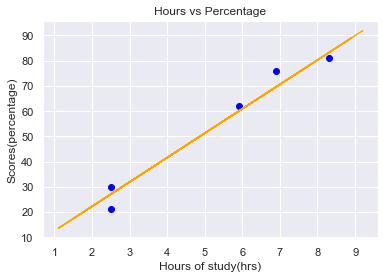

In [17]:
plt.scatter(x_test, y_test ,color='blue',marker='o')
Y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, Y_hat, color='orange')
plt.title('Hours vs Percentage')
plt.xlabel('Hours of study(hrs)')
plt.ylabel('Scores(percentage)')
plt.show()

# Predicted Score

In [18]:
z= linear_regression_model.predict([1,9.25])
data = pd.DataFrame([9.25], columns=["Hours of study(hrs)"])
data["Prediction score"]=z
data                   

,Hours of study(hrs),Prediction score
0,9.25,92.386115


# Conclusion

So, if the student studies for 9.25 hrs/day, then the predicted score is 92.386.